# Inverting image operations

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.sparse as sparse
import scipy.sparse.linalg as spla
%matplotlib inline

# https://matplotlib.org/users/customizing.html
# print(plt.style.available) # uncomment to print all styles
import seaborn as sns
sns.set(font_scale=2)
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = (10.0, 8.0)

## Import an image of a Social Security Number

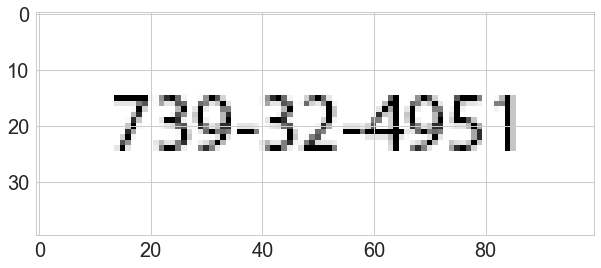

In [2]:
from PIL import Image
img = Image.open('ssn.png')
xmat = (255 - np.asarray(img).max(axis=2))/255
plt.imshow(xmat);

In [4]:
xmat.shape

(40, 100)

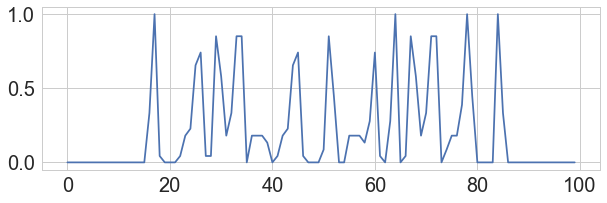

In [5]:
plt.figure(figsize=(10,3))
plt.plot(xmat[20,:])

## Flatten the image into a vector

In [7]:
x = xmat.flatten()
x.shape

(4000,)

## Construct a "blur" matrix

In [17]:
def setup_filter_parameters(rmin,nelx,nely):
    # Filter: Build (and assemble) the index+data vectors for the coo matrix format
    nfilter=int(nelx*nely*((2*(np.ceil(rmin)-1)+1)**2))
    iH = np.zeros(nfilter)
    jH = np.zeros(nfilter)
    sH = np.zeros(nfilter)
    cc=0
    for i in range(nelx):
        for j in range(nely):
            row=i*nely+j
            kk1=int(np.maximum(i-(np.ceil(rmin)-1),0))
            kk2=int(np.minimum(i+np.ceil(rmin),nelx))
            ll1=int(np.maximum(j-(np.ceil(rmin)-1),0))
            ll2=int(np.minimum(j+np.ceil(rmin),nely))
            for k in range(kk1,kk2):
                for l in range(ll1,ll2):
                    col=k*nely+l
                    fac=rmin-np.sqrt(((i-k)*(i-k)+(j-l)*(j-l)))
                    iH[cc]=row
                    jH[cc]=col
                    sH[cc]=np.maximum(0.0,fac/rmin)
                    cc=cc+1
    # Finalize assembly and convert to csc format
    H=sparse.coo_matrix((sH,(iH,jH)),shape=(nelx*nely,nelx*nely)).tocsc()
    return H

rmin = 6
nelx = xmat.shape[0]
nely = xmat.shape[1]
A = setup_filter_parameters(rmin,nelx,nely)

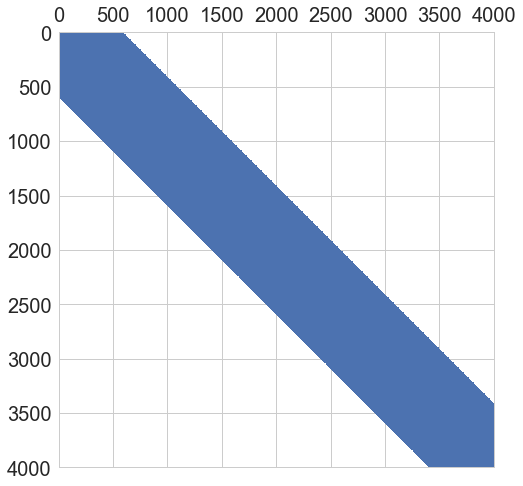

In [18]:
plt.spy(A)

## Compute y = A x

In [19]:
y = A @ x

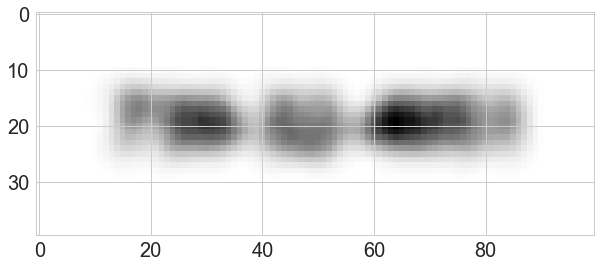

In [20]:
plt.imshow(y.reshape(xmat.shape));


In [ ]:
y2D=y.reshape(xmat.shape)
plt.imshow(y2D)
plt.axis([20,35,25,15])

## Assume we have the blurred image, solve for the unblurred one

In [21]:
x_solve = spla.spsolve(A, y)

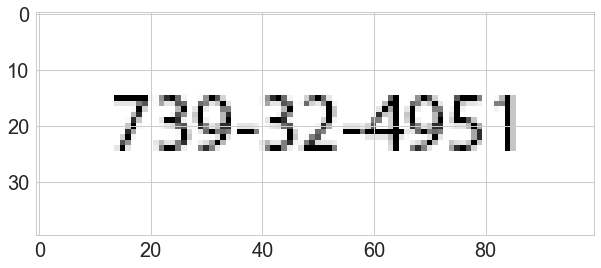

In [22]:
plt.imshow(x_solve.reshape(xmat.shape));

## What if our blurred image was slightly noisy?

In [31]:
y_noisy = y + 1e-2 * np.random.rand(y.size)

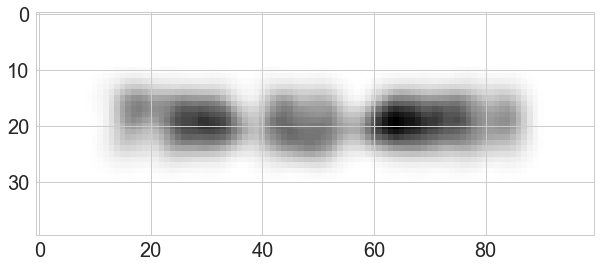

In [32]:
plt.imshow(y_noisy.reshape(xmat.shape));

In [33]:
x_noisy = spla.spsolve(A, y_noisy)

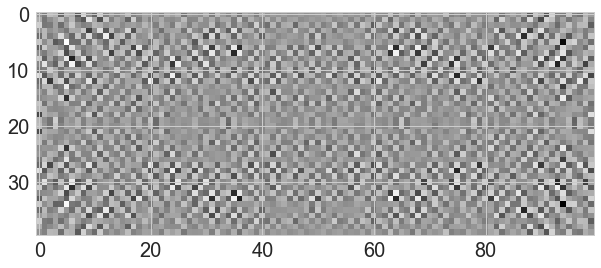

In [34]:
plt.imshow(x_noisy.reshape(xmat.shape));

What if we change the noise coefficient to 1e-5, 1e-4, or even 1e-3?